In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score as accuracy

In [2]:
df = pd.read_csv('data2.csv')
data = df.values
X = data[:, :2]
Y = data[:, 2].reshape(-1, 1)

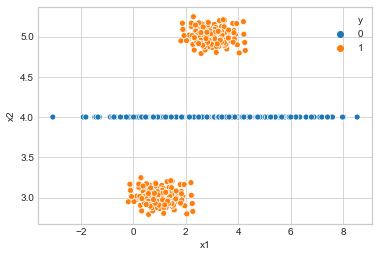

In [21]:
sns.set_style('whitegrid')
sns.scatterplot(x='x1', y='x2', hue='y', data=df)

In [4]:
def activation_function(x):
    return 1 / (1 + np.exp(-x))

def activation_deriv(z):
    return z * (1 - z)

In [10]:
class NeuralNet:
    
    def __init__(self, hidden_layers=(4, ), alpha=0.01, iterations=10000):
        self.layers = hidden_layers
        self.alpha = alpha
        self.iterations = iterations
        self.neurons = None
    
    def init_weights(self, input_size):
        self.layers = (input_size, *self.layers, 1)
        np.random.seed(42)
        self.B = [np.zeros((self.layers[i], )) for i in range(1, len(self.layers))]
        self.W = [np.random.randn(self.layers[i], self.layers[i + 1]) for i in range(len(self.layers) - 1)]
    
    def forwards(self):
        self.neurons = []
        self.neurons.append(self.X)
        activation = self.X
        for layer in range(len(self.layers) - 1):
            hidden_value = np.dot(activation, self.W[layer]) + self.B[layer]
            self.neurons.append(hidden_value)
            activation = activation_function(hidden_value)
            self.neurons.append(activation)
        return activation
    
    def backwards(self, prediction):
        delta = self.Y - prediction
        updates = []
        W_1 = self.W + [np.array(1)]
        for layer in range(len(self.layers) - 1, 0, -1):
            delta = delta.dot(W_1[layer].T) * activation_deriv(self.neurons[2 * layer])
            W_update = self.neurons[2 * (layer - 1)].T.dot(delta)
            B_update = np.sum(delta, axis=0)
            updates.append(W_update)
            updates.append(B_update)
        for i in range(len(self.W) - 1, -1, -1):
            self.W[-i - 1] = self.W[-i - 1] + self.alpha * updates[2 * i]
            self.B[-i - 1] = self.B[-i - 1] + self.alpha * updates[2 * i + 1]
    
    def fit(self, x, y):
        self.X = x
        self.Y = y
        self.init_weights(self.X.shape[1])
        for it in range(self.iterations):
            prediction = self.forwards()
            self.backwards(prediction)
    
    def predict(self, x):
        activation = x
        for layer in range(len(self.layers) - 1):
            hidden_value = np.dot(activation, self.W[layer]) + self.B[layer]
            activation = activation_function(hidden_value)
        return np.round(activation)

In [9]:
sizes = [(), (3,), (5, ), (10, ),
         (3, 3), (5, 5), (10, 10),
         (4, 4, 4, 4), (20, 20, 20)]
for layer_size in sizes:
    net1 = NeuralNet(hidden_layers=layer_size, alpha=0.1)
    net1.fit(X, Y)
    print('Neural network with hidden layer sizes: {}, '
          'alpha = {}, scored {} accuracy'.format(layer_size, 0.1, accuracy(Y, net1.predict(X))))
    net2 = NeuralNet(hidden_layers=layer_size)
    net2.fit(X, Y)
    print('Neural network with hidden layer sizes: {}, '
          'alpha = {}, scored {} accuracy'.format(layer_size, 0.01, accuracy(Y, net2.predict(X))))
    net3 = NeuralNet(hidden_layers=layer_size, alpha=0.001)
    net3.fit(X, Y)
    print('Neural network with hidden layer sizes: {}, '
          'alpha = {}, scored {} accuracy'.format(layer_size, 0.001, accuracy(Y, net3.predict(X))))

Neural network with hidden layer sizes: (), alpha = 0.1, scored 0.5 accuracy
Neural network with hidden layer sizes: (), alpha = 0.01, scored 0.705 accuracy
Neural network with hidden layer sizes: (), alpha = 0.001, scored 0.7383333333333333 accuracy
Neural network with hidden layer sizes: (3,), alpha = 0.1, scored 0.75 accuracy
Neural network with hidden layer sizes: (3,), alpha = 0.01, scored 1.0 accuracy
Neural network with hidden layer sizes: (3,), alpha = 0.001, scored 0.81 accuracy
Neural network with hidden layer sizes: (5,), alpha = 0.1, scored 0.805 accuracy
Neural network with hidden layer sizes: (5,), alpha = 0.01, scored 1.0 accuracy
Neural network with hidden layer sizes: (5,), alpha = 0.001, scored 0.8083333333333333 accuracy
Neural network with hidden layer sizes: (10,), alpha = 0.1, scored 0.805 accuracy
Neural network with hidden layer sizes: (10,), alpha = 0.01, scored 1.0 accuracy
Neural network with hidden layer sizes: (10,), alpha = 0.001, scored 0.93 accuracy
Neur

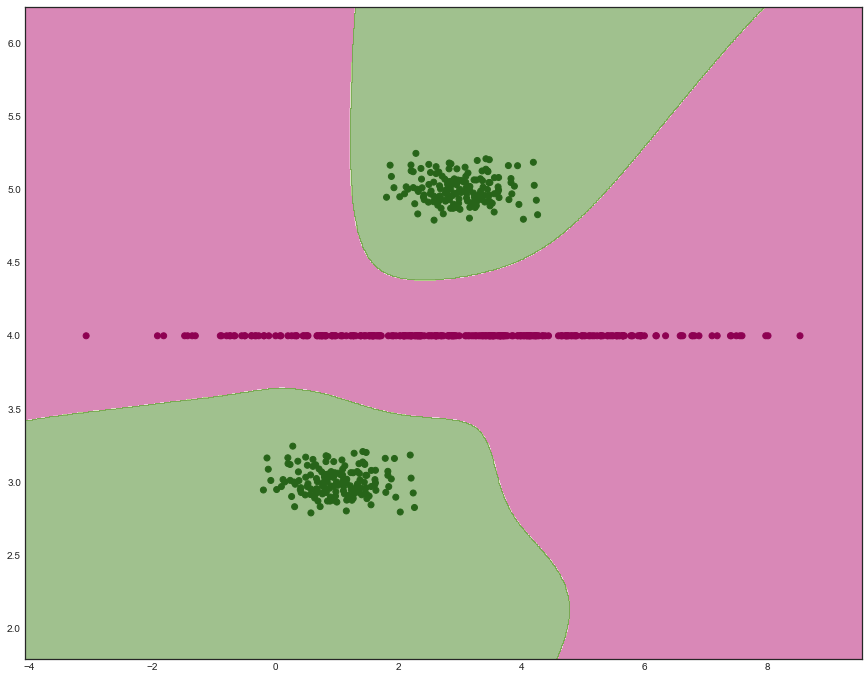

In [18]:
plt.style.use('seaborn-white')
xmin = X[:,0].min() - 1
xmax = X[:,0].max() + 1
ymin = X[:,1].min() - 1
ymax = X[:,1].max() + 1
grid = np.meshgrid(np.linspace(xmin, xmax, 1000), np.linspace(ymin, ymax, 1000))
values = net2.predict(np.c_[grid[0].ravel(), grid[1].ravel()]).reshape(grid[0].shape)
f, a = plt.subplots()
a.contourf(grid[0], grid[1], values, cmap='PiYG', alpha=0.5)
a.scatter(X[:,0], X[:,1], c=Y, cmap='PiYG')